In [2]:
import gensim
import numpy as np
import math

#Download https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
def w2vec_model():
  print "LOADING WORD2VEC MODEL"
  model = gensim.models.Word2Vec.load_word2vec_format('/Users/danielsampetethiyagu/Downloads/GoogleNews-vectors-negative300.bin', binary=True)
  print "LOADED WORD2VEC MODEL"
  return model
w2v_model = w2vec_model()

/Users/danielsampetethiyagu/anaconda/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


LOADING WORD2VEC MODEL
LOADED WORD2VEC MODEL


In [3]:
from sklearn import svm
from nltk.tokenize import word_tokenize

def tokensOfDocument(document):
    return word_tokenize(document)

trainInputSentences = ["This is a good place", "This is a bad place"]
trainInputAnswers = [1,0]
testInputSentences = ["This is a very bad place"]
testInputAnswers = [1]

def convertDocumentToVector(w2v_model, sentence, dimensionOfVector):
    tokens = tokensOfDocument(sentence)
    Vector = np.zeros((dimensionOfVector,))
    for token in tokens:
        if(token in w2v_model):
            Vector += w2v_model[token]
    return Vector

def processInputSet(inputSentences, w2v_model, inputAnswers, dimensionOfVector):
    inputX = []
    inputY = inputAnswers
    for sentence in inputSentences:
        inputSentenceVector = convertDocumentToVector(w2v_model, sentence, dimensionOfVector)
        inputX.append(inputSentenceVector)
    return inputX, inputY

trainX, trainY = processInputSet(trainInputSentences, w2v_model, trainInputAnswers,300)
testX, testY = processInputSet(testInputSentences, w2v_model, testInputAnswers,300)
clf = svm.SVC()
clf.fit(trainX, trainY) 
clf.predict(testX)


array([0])

In [34]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf


# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 500

def read_data_file(filename):
    fileToRead = open(filename,"r") 
    data = fileToRead.read().decode('utf-8').split() 
    return data

words = read_data_file("data/dummy_data.txt")
print("Data Set Size ",(len(words)))

def build_dataset(words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()
  #creating an index/ID for the words
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
del words  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [skip_window]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]],
        '->', labels[i, 0], reverse_dictionary[labels[i, 0]])


Data Set Size  1943
Most common words (+UNK) [['UNK', 431], (u'the', 92), (u'of', 63), (u'and', 58), (u'to', 50)]
Sample data [0, 1, 0, 9, 196, 4, 313, 71, 37, 183] ['UNK', u'the', 'UNK', u'that', u'helped', u'to', u'crystallize', u'what', u'would', u'come']
1 the -> 0 UNK
1 the -> 0 UNK
0 UNK -> 9 that
0 UNK -> 1 the
9 that -> 0 UNK
9 that -> 196 helped
196 helped -> 4 to
196 helped -> 9 that


In [33]:

data

[0,
 1,
 0,
 9,
 196,
 4,
 313,
 71,
 37,
 183,
 4,
 41,
 339,
 11,
 1,
 40,
 67,
 10,
 5,
 139,
 6,
 279,
 135,
 14,
 1,
 397,
 0,
 13,
 0,
 265,
 0,
 24,
 150,
 12,
 1,
 107,
 10,
 0,
 0,
 42,
 0,
 406,
 72,
 1,
 110,
 2,
 297,
 5,
 294,
 104,
 42,
 1,
 491,
 417,
 248,
 342,
 118,
 72,
 50,
 2,
 1,
 0,
 0,
 12,
 68,
 17,
 428,
 181,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 58,
 323,
 3,
 0,
 11,
 203,
 11,
 17,
 404,
 3,
 25,
 0,
 316,
 44,
 225,
 15,
 3,
 1,
 487,
 2,
 47,
 59,
 161,
 8,
 152,
 80,
 43,
 5,
 17,
 95,
 401,
 483,
 12,
 73,
 0,
 62,
 29,
 181,
 0,
 1,
 150,
 42,
 1,
 172,
 3,
 0,
 0,
 120,
 20,
 28,
 221,
 37,
 0,
 11,
 0,
 2,
 484,
 46,
 178,
 9,
 1,
 107,
 0,
 0,
 17,
 144,
 6,
 293,
 368,
 88,
 52,
 50,
 6,
 0,
 131,
 1,
 0,
 2,
 1,
 463,
 0,
 3,
 1,
 267,
 2,
 381,
 384,
 99,
 0,
 20,
 466,
 83,
 22,
 0,
 0,
 174,
 0,
 79,
 175,
 3,
 0,
 467,
 0,
 23,
 123,
 0,
 0,
 0,
 0,
 4,
 5,
 458,
 2,
 0,
 66,
 303,
 42,
 120,
 3,
 0,
 42,
 63,
 17,
 0,
 228,
 1,
 366,
 2,
 1,
 139,
 2

In [16]:
# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default():

  # Input data.
  train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size],
                            stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  loss = tf.reduce_mean(
      tf.nn.nce_loss(weights=nce_weights,
                     biases=nce_biases,
                     labels=train_labels,
                     inputs=embed,
                     num_sampled=num_sampled,
                     num_classes=vocabulary_size))

  # Construct the SGD optimizer using a learning rate of 1.0.
  optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(
      normalized_embeddings, valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Add variable initializer.
  init = tf.global_variables_initializer()

# Step 5: Begin training.
num_steps = 1000

with tf.Session(graph=graph) as session:
  # We must initialize all variables before we use them.
  init.run()
  print("Initialized")

  average_loss = 0
  for step in xrange(num_steps):
    batch_inputs, batch_labels = generate_batch(
        batch_size, num_skips, skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += loss_val

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print("Average loss at step ", step, ": ", average_loss)
      average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in xrange(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8  # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k + 1]
        log_str = "Nearest to %s:" % valid_word
        for k in xrange(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log_str = "%s %s," % (log_str, close_word)
        print(log_str)
  final_embeddings = normalized_embeddings.eval()


Initialized
Average loss at step  0 :  123.118637085
Nearest to way: Locke,, wrote, Brace, sketches,, acknowledge, into, 1924,, first-rate,
Nearest to black: sister, N.A.A.C.P.,, publish, Jessie’s, struggle, worst, can, time.”),
Nearest to matter: grows, women, first, returned, the, credit, no, individuality,,
Nearest to more: like, end, well, High, is,, tries, proofreader, York,
Nearest to know: writes, focus, dealt, published, stemmed, evening, tries, scathing,
Nearest to do: editor, book, reviews, Levering, train, Du, novels, idea,
Nearest to In: including, then,, several, treasurer,, centers, Color,”, By, League,
Nearest to their: move, Oberon, been, print, she, returned, say,, scholar,
Nearest to High: questions, living, York,, Crisis, more, and, never, Renaissance,,
Nearest to what: A, along, today:, until, rather, N.A.A.C.P.,, aimed, then,
Nearest to told: going, vague,, essays., editors, “When, own, me, Does,
Nearest to so: Philadelphia, residents, making, “Some, frank, first, 

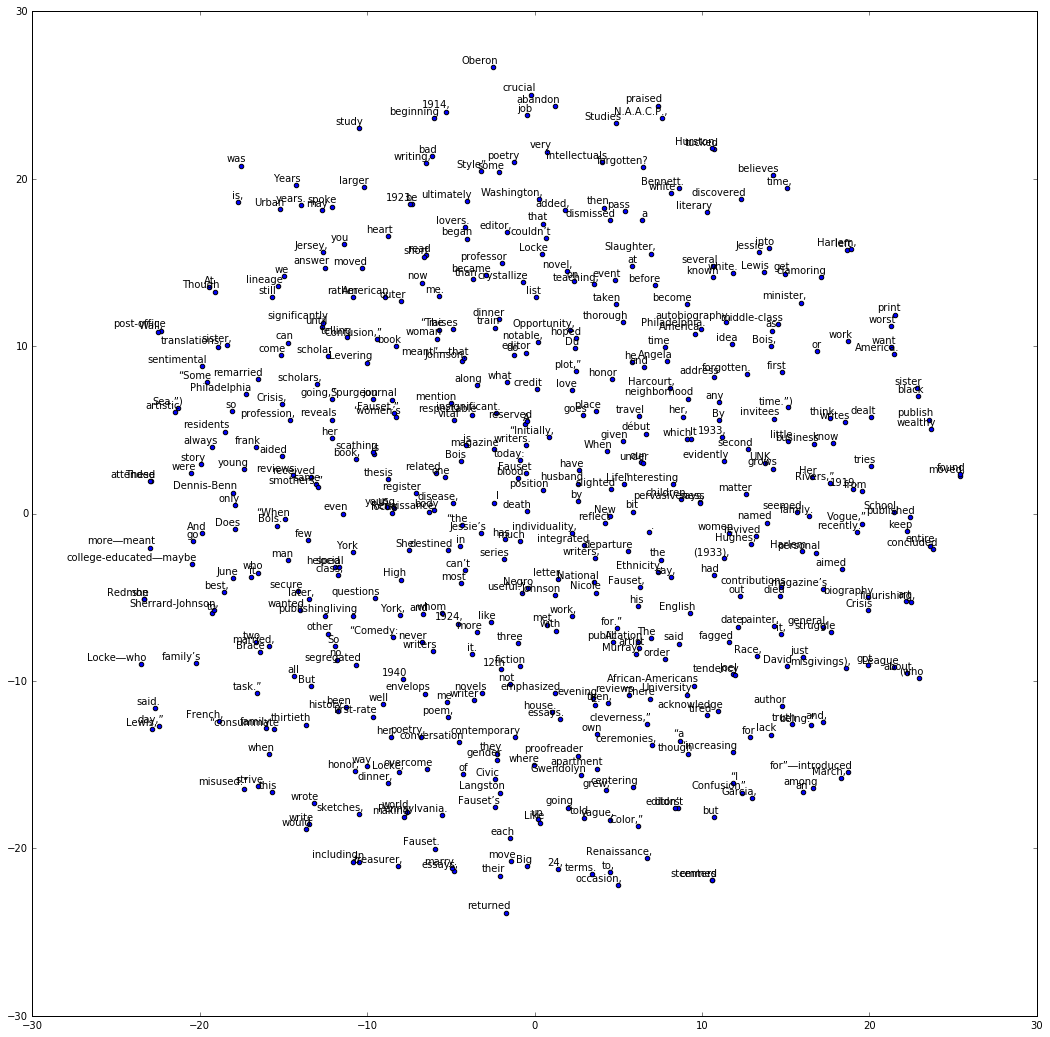

In [17]:
%matplotlib inline
# Step 6: Visualize the embeddings.


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
  assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

try:
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels)

except ImportError:
  print("Please install sklearn, matplotlib, and scipy to visualize embeddings.")


In [19]:
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1)

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()
 



In [24]:
sentences = MySentences('data') # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences)
for i in sentences:
    print(i)
print(sentences)

['Among', 'the', 'events', 'that', 'helped', 'to', 'crystallize', 'what', 'would', 'come', 'to', 'be', 'known', 'as', 'the', 'Harlem', 'Renaissance', 'was', 'a', 'dinner,', 'in', 'March,', '1924,', 'at', 'the', 'Civic', 'Club,', 'on', 'West', '12th', 'Street.', 'The', 'idea', 'for', 'the', 'dinner', 'was', 'initially', 'hatched', 'by', 'Charles', 'Spurgeon', 'Johnson,', 'the', 'editor', 'of', 'Opportunity,', 'a', 'journal', 'published', 'by', 'the', 'National', 'Urban', 'League', 'and,', 'under', 'Johnson,', 'one', 'of', 'the', 'leading', 'outlets', 'for', 'young', 'black', 'writers.', 'Johnson', 'planned', 'to', 'invite', 'twenty', 'guests\xe2\x80\x94a', 'mix', 'of', 'white', 'editors', 'and', 'publishers', 'as', 'well', 'as', 'black', 'intellectuals', 'and', 'literary', 'critics\xe2\x80\x94to', 'honor', 'Jessie', 'Redmon', 'Fauset', 'and', 'the', 'publication', 'of', '\xe2\x80\x9cThere', 'Is', 'Confusion,\xe2\x80\x9d', 'her', 'd\xc3\xa9but', 'novel,', 'about', 'a', 'black', 'middle-c